###  Fashion MNIST with Multinomial Regression

In [1]:
import pandas as pd

train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [2]:
import numpy as np

train_df = np.asarray(train_df)
test_df = np.asarray(test_df)

In [3]:
train_images = train_df[:,1:785]
train_labels = train_df[:, 0]

test_images = test_df[:, 1:785]
test_labels = test_df[:, 0]

train_images = train_images/255
test_images = test_images/255

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(train_images,train_labels , test_size = 0.2 , random_state = 2020)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=200)
# and train model by Training Dataset
lorg.fit(X_train,y_train)
# Then Predict the Test data
Y_pred_val=lorg.predict(X_val)
# for accuracy
from sklearn.metrics import accuracy_score
print("Accuracy for validation set: ", accuracy_score(y_val,Y_pred_val))


Accuracy for validation set:  0.8533333333333334


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy for test set:  0.8528


<Axes: >

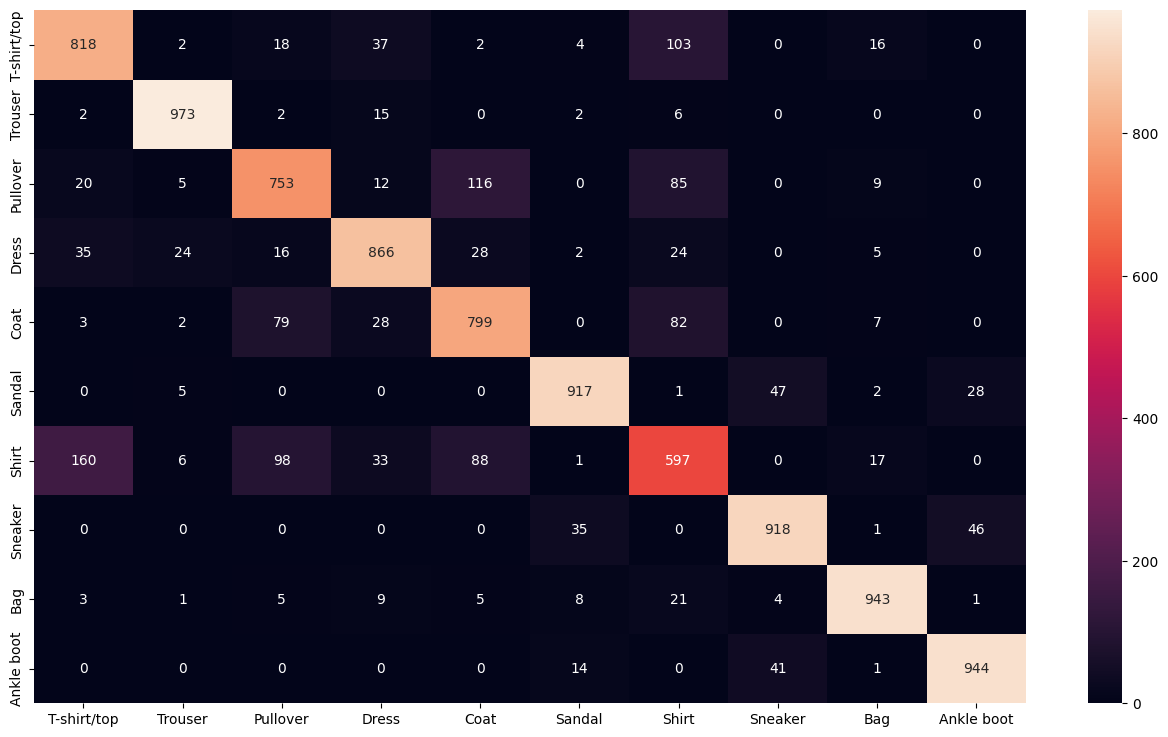

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (16,9))
Y_pred_test=lorg.predict(test_images)
confusion_mat = confusion_matrix(test_labels,Y_pred_test)
print("Accuracy for test set: ", accuracy_score(test_labels,Y_pred_test))
sns.heatmap(confusion_mat , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)